# Xử lý ảnh

## INT3404 20 ----- 8-10 Monday - 309GD3
## Diep Ng., Ph.D.

### Mail-to: ngocdiep at vnu.edu.vn

## Week 5: Feature extraction

Edge, Line, Texture


In [3]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [4]:
%matplotlib inline


In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import math

In [28]:
plt.rcParams['figure.figsize'] = [10,8]

# Mask shape

### Ellipse shape

In [5]:
mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
mask

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [8]:
mask = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Rectangle shape

In [7]:
mask = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3)) # (8-neighbor)
mask

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [9]:
mask = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
mask

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

### Cross shape

In [11]:
mask = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
mask

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [12]:
mask = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
mask

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Edge detection

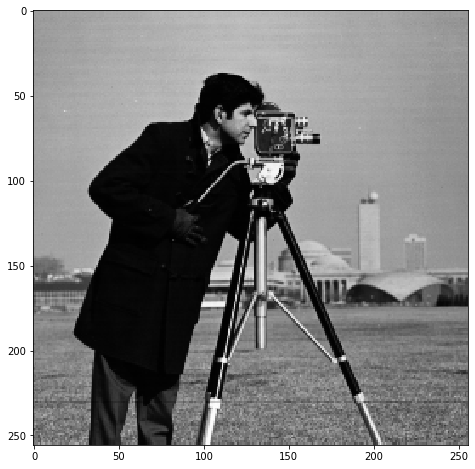

In [13]:
image = cv2.imread("cameraman.png", 0)
plt.imshow(image, cmap='gray')

### Canny edge detection

 `cv.Canny(image, edges, threshold1, threshold2, apertureSize = 3, L2gradient = false)`
 
- image	8-bit input image.
- edges	output edge map; single channels 8-bit image, which has the same size as image.
- threshold1	first threshold for the hysteresis procedure.
- threshold2	second threshold for the hysteresis procedure..
- apertureSize	aperture size for the Sobel operator.
- L2gradient	specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|.


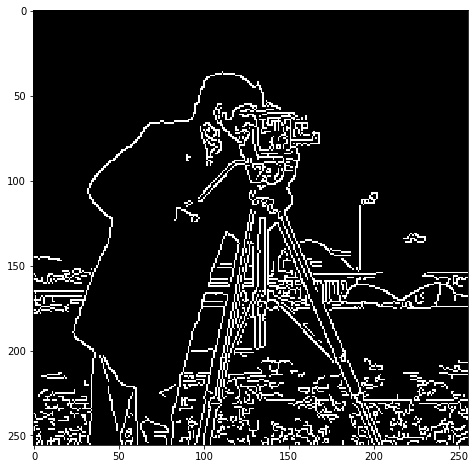

In [49]:
image = cv2.imread('cameraman.png', 0)
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')

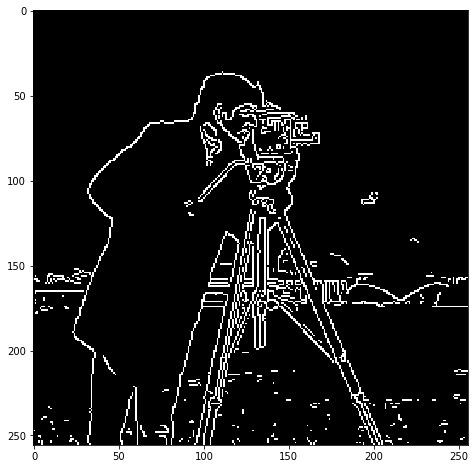

In [51]:
edges = cv2.Canny(image, 200, 240)
plt.imshow(edges, cmap='gray')

In [52]:
cv2.imwrite("canny.png", edges)

True

### Laplacian of Gaussian (LoG)

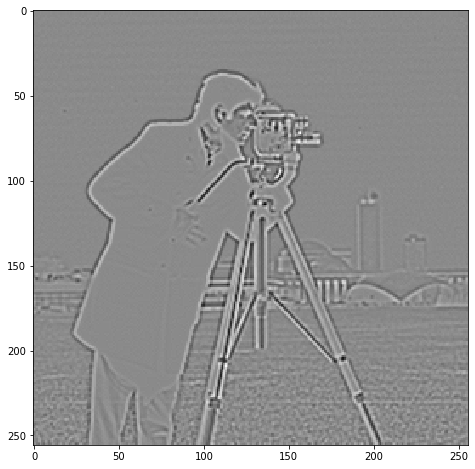

In [53]:
blur = cv2.GaussianBlur(image, (3, 3), 0)
laplacian = cv2.Laplacian(blur, cv2.CV_64F)

#
laplacian1 = laplacian/laplacian.max()
plt.imshow(laplacian1, cmap='gray')

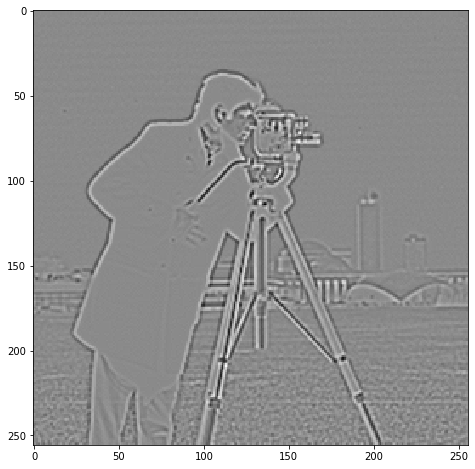

In [54]:
plt.imshow(laplacian, cmap='gray')

 # Line detection

In [63]:
img = cv2.imread("table.jpg")
img = imutils.resize(img, width=256)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img, 100, 200, 30)

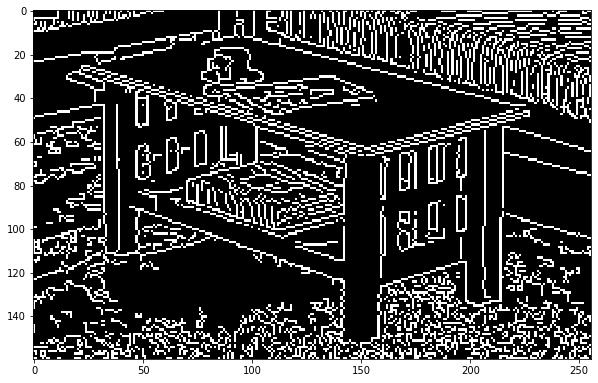

In [64]:
plt.imshow(edges, cmap='gray')

In [65]:
img.shape

(160, 256, 3)

In [82]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 95)

In [83]:
# cv2.HoughLines??



### Hough line transform parameters

```
dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
lines: A vector that will store the parameters (r,θ) of the detected lines
rho : The resolution of the parameter r in pixels. We use 1 pixel.
theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
threshold: The minimum number of intersections to "*detect*" a line
srn and stn: Default parameters to zero. Check OpenCV reference for more info.
```

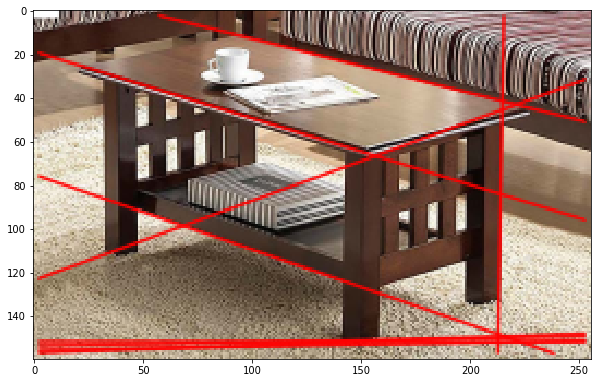

In [84]:
copy = img.copy()
for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(copy, pt1, pt2, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(copy[...,::-1])

## Probabilistic Hough line transform

arguments:
```
dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines
rho : The resolution of the parameter r in pixels. We use 1 pixel.
theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
threshold: The minimum number of intersections to "*detect*" a line
minLinLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
maxLineGap: The maximum gap between two points to be considered in the same line.
```

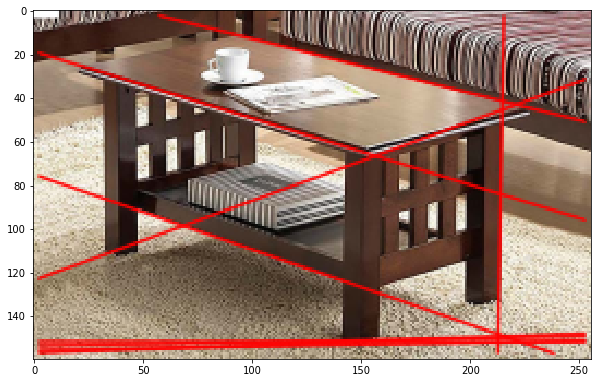

In [86]:
copy2 = img.copy()
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, 50, None, 50, 10)
for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv2.line(copy2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

    plt.imshow(copy[...,::-1])

# Texture analysis

Reference code: http://hanzratech.in/2015/05/30/local-binary-patterns.html


In [91]:
from skimage.feature.texture import local_binary_pattern
from scipy.stats import itemfreq
from sklearn.preprocessing import normalize


/Users/chupi/anaconda3/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


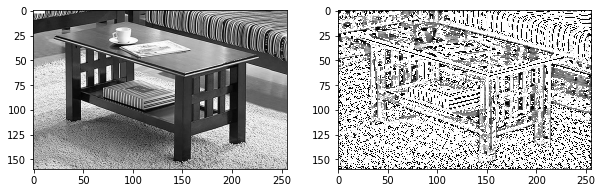

In [93]:
img = cv2.imread("table.jpg")
img = imutils.resize(img, width=256)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

radius = 3
no_points = 8*radius # number of points to be considered as neighbors
#uniform LBP
lbp = local_binary_pattern(gray, no_points, radius, method='uniform')
x = itemfreq(lbp.ravel())
hist = x[:,1]/sum(x[:,1])

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')

## Grey-level Co-occurence Matrix

Reference: https://scikit-image.org/docs/0.7.0/api/skimage.feature.texture.html

arguments:
```
image : array_like of uint8
    Integer typed input image. The image will be cast to uint8, so the maximum value must be less than 256.

distances : array_like
    List of pixel pair distance offsets.

angles : array_like
    List of pixel pair angles in radians.

levels : int, optional
    The input image should contain integers in [0, levels-1], where levels indicate the number of grey-levels counted (typically 256 for an 8-bit image). The maximum value is 256.

symmetric : bool, optional
    If True, the output matrix P[:, :, d, theta] is symmetric. This is accomplished by ignoring the order of value pairs, so both (i, j) and (j, i) are accumulated when (i, j) is encountered for a given offset. The default is False.

normed : bool, optional
    If True, normalize each matrix P[:, :, d, theta] by dividing by the total number of accumulated co-occurrences for the given offset. The elements of the resulting matrix sum to 1. The default is False.
    

Output: P : 4-D ndarray

The grey-level co-occurrence histogram. The value P[i,j,d,theta] is the number of times that grey-level j occurs at a distance d and at an angle theta from grey-level i. If normed is False, the output is of type uint32, otherwise it is float64.
```

In [97]:
from skimage.feature import greycomatrix

glcm = greycomatrix(gray, [1], [0, np.pi/2], levels=256)


In [98]:
glcm[:,:,0, 0]

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 11,  2,  1],
       [ 0,  0,  0, ...,  4,  5,  0],
       [ 0,  0,  0, ...,  0,  3, 13]], dtype=uint32)

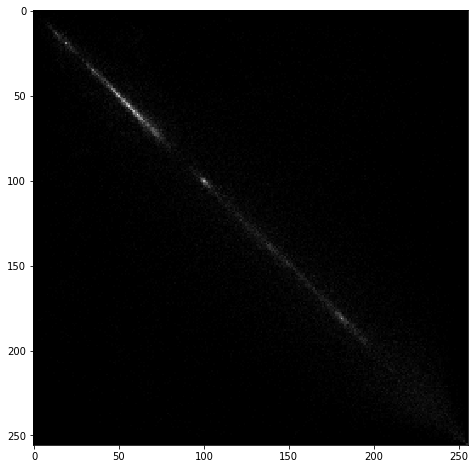

In [99]:
plt.imshow(glcm[:,:,0,0], cmap='gray')

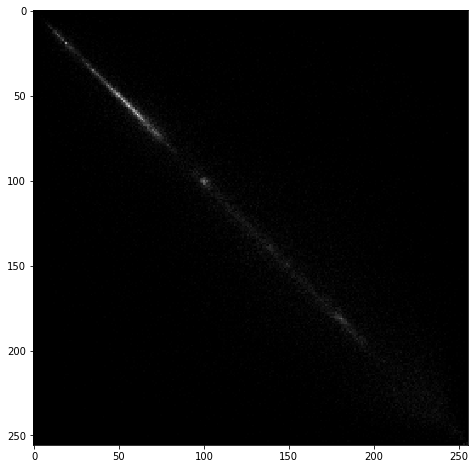

In [102]:
plt.imshow(glcm[:,:,0,1], cmap='gray')

In [103]:
from skimage.feature.texture import greycoprops

In [106]:
contrast = greycoprops(glcm, 'contrast')
contrast

array([[1205.14529412, 1072.33854167]])

# Image segmentation using Mean shift algorithm

Reference: https://github.com/fjean/pymeanshift

In [107]:
import pymeanshift as pms

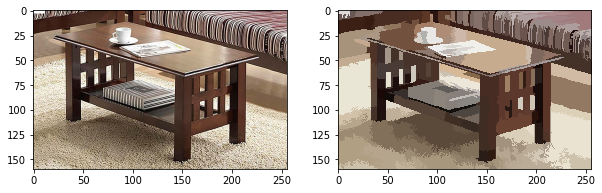

In [108]:
(segmented_image, labels_image, number_regions) = pms.segment(img,
                                                              spatial_radius=6,
                                                              range_radius=4.5,
                                                              min_density=50
                                                )

plt.subplot(1,2,1)
plt.imshow(img[...,::-1])
plt.subplot(1,2,2)
plt.imshow(segmented_image[...,::-1])